<a href="https://colab.research.google.com/github/Aldoptma0704/Image-Feature-Extraction/blob/main/Sobel%2C_Prewitt%2C_and_Roberts_Operators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset

https://www.kaggle.com/datasets/trainingdatapro/male-selfie-image-dataset

In [1]:
#Import Library yang diperlukan
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpig

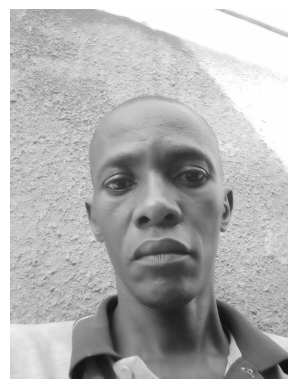

In [6]:
image = cv2.imread('Output/9.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(image,cmap='gray')
plt.axis('off')
plt.show()

#Sobel

In [7]:
Gx = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
Gy = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

In [8]:
def convolve(X, F):
    X_height = X.shape[0]
    X_width = X.shape[1]

    F_height = F.shape[0]
    F_width = F.shape[1]

    H = (F_height - 1) // 2
    W = (F_width - 1) // 2

    out = np.zeros((X_height, X_width))
    for i in np.arange(H, X_height-H):
        for j in np.arange(W, X_width-W):
            sum = 0
            for k in np.arange(-H, H+1):
                for l in np.arange(-W, W+1):
                    a = X[i+k, j+l]
                    w = F[H+k, W+l]
                    sum += (w * a)
            out[i,j] = sum
    return out

In [9]:
sob_x = convolve(image, Gx) / 8.0
sob_y = convolve(image, Gy) / 8.0

In [10]:
sob_out = np.sqrt(np.power(sob_x, 2) + np.power(sob_y, 2))
sob_out = (sob_out / np.max(sob_out)) * 255

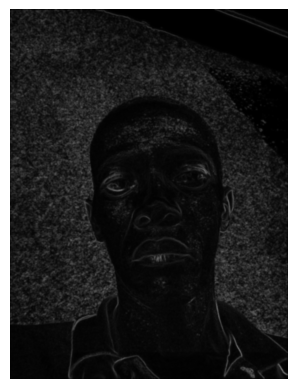

In [11]:
#output images
cv2.imwrite('output/sobel_jet.jpg', sob_out)
plt.imshow(sob_out, cmap = 'gray', interpolation = 'bicubic')
plt.axis('off')
plt.show()

#Prewritt

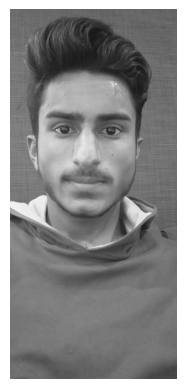

In [17]:
image = cv2.imread('Output/10.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(image,cmap='gray')
plt.axis('off')
plt.show()

In [18]:
Hx = np.array([[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]])
Hy = np.array([[-1, -1, -1],[0, 0, 0],[1, 1, 1]])

In [19]:
pre_x = convolve(image, Hx) / 6.0
pre_y = convolve(image, Hy) / 6.0

In [22]:
#calculate the gradient magnitude of vectors
pre_out = np.sqrt(np.power(pre_x, 2) + np.power(pre_y, 2))
# mapping values from 0 to 255
pre_out = (pre_out / np.max(pre_out)) * 255

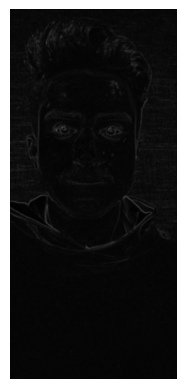

In [23]:
#output images
cv2.imwrite('output/prewitt_knife.jpg', pre_out)
plt.imshow(pre_out, cmap = 'gray', interpolation = 'bicubic')
plt.axis('off')
plt.show()

#ROBERTS

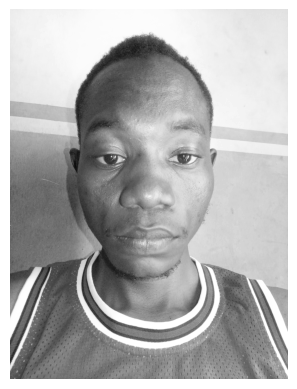

In [24]:
image = cv2.imread('Output/7.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(image,cmap='gray')
plt.axis('off')
plt.show()

In [25]:
roberts_cross_v = np.array([[1, 0], [0, -1]], dtype=np.float32)
roberts_cross_h = np.array([[0, 1], [-1, 0]], dtype=np.float32)

In [26]:
robertsx = cv2.filter2D(image, -1, roberts_cross_v)
robertsy = cv2.filter2D(image, -1, roberts_cross_h)

In [27]:
roberts_combined = np.sqrt(np.square(robertsx) + np.square(robertsy))

In [28]:
roberts_combined = (roberts_combined / np.max(roberts_combined)) * 255

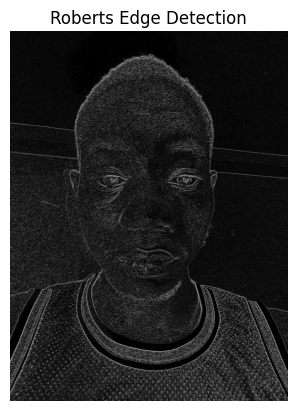

In [31]:
plt.imshow(roberts_combined, cmap='gray')
plt.axis('off')
plt.title("Roberts Edge Detection")
plt.show()